<a href="https://colab.research.google.com/github/Saif-EldinHatem/Student-Health-Care/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing Libraries and Data**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
#import train data
df_train = pd.read_csv("healthcare_train.csv")

##**Data Overview**

###Display the first 5 rows

In [ ]:
df_train.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
1,Chad Byrd,61,Male,B-,NaN,2019-01-09,Paul Baker,Walton LLC,Medicare,0.000000,292,Emergency,2019-02-08,Lipitor,Normal
2,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,-480,Urgent,2020-05-03,Penicillin,Abnormal
3,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,-18086.344184,477,Urgent,2021-08-02,NaN,Normal
4,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal


###Dimensions of Data

In [ ]:
df_train.shape

(6050, 15)

###Check data types

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6050 entries, 0 to 6049
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                6050 non-null   object 
 1   Age                 6050 non-null   int64  
 2   Gender              6050 non-null   object 
 3   Blood Type          6050 non-null   object 
 4   Medical Condition   6041 non-null   object 
 5   Date of Admission   6050 non-null   object 
 6   Doctor              6050 non-null   object 
 7   Hospital            6050 non-null   object 
 8   Insurance Provider  6050 non-null   object 
 9   Billing Amount      6050 non-null   float64
 10  Room Number         6050 non-null   int64  
 11  Admission Type      6050 non-null   object 
 12  Discharge Date      6050 non-null   object 
 13  Medication          6042 non-null   object 
 14  Test Results        6050 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 709.1

###Check Duplicates

In [ ]:
df_train.duplicated().sum()

1

###Drop Duplicates

In [ ]:
df_train.drop_duplicates()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
1,Chad Byrd,61,Male,B-,NaN,2019-01-09,Paul Baker,Walton LLC,Medicare,0.000000,292,Emergency,2019-02-08,Lipitor,Normal
2,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,-480,Urgent,2020-05-03,Penicillin,Abnormal
3,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,-18086.344184,477,Urgent,2021-08-02,NaN,Normal
4,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6045,Lisa Richardson,50,Male,A+,Asthma,2018-12-23,Tamara Rogers,Henderson-Johnson,Cigna,9725.556429,258,Urgent,2019-01-16,Lipitor,Normal
6046,Monica Brooks,22,Female,B-,Diabetes,2020-03-07,Isaac Bell,Silva-Roth,Cigna,47725.059359,479,Emergency,2020-03-25,Paracetamol,Normal
6047,Tonya Pineda,82,Female,O-,Hypertension,2019-09-06,Daniel Zhang,Bowman Inc,Cigna,45814.581808,276,Elective,2019-09-14,Lipitor,Normal
6048,Angel Davis,53,Male,O+,Cancer,2021-06-05,Amy Jackson,Edwards Ltd,UnitedHealthcare,6052.482315,237,Emergency,2021-06-25,Paracetamol,Abnormal


###Handling Date Columns

In [ ]:
df_train['Date of Admission'] = pd.to_datetime(df_train['Date of Admission'])

# extract the day, month, and year components
df_train['Admission day'] = df_train['Date of Admission'].dt.day
df_train['Admission month'] = df_train['Date of Admission'].dt.month
df_train['Admission year'] = df_train['Date of Admission'].dt.year

df_train.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Admission day,Admission month,Admission year
0,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,1,6,2023
1,Chad Byrd,61,Male,B-,NaN,2019-01-09,Paul Baker,Walton LLC,Medicare,0.000000,292,Emergency,2019-02-08,Lipitor,Normal,9,1,2019
2,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,-480,Urgent,2020-05-03,Penicillin,Abnormal,2,5,2020
3,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,-18086.344184,477,Urgent,2021-08-02,NaN,Normal,9,7,2021
4,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal,20,8,2020


In [ ]:
df_train['Discharge Date'] = pd.to_datetime(df_train['Discharge Date'])

# extract the day, month, and year components
df_train['Discharge day'] = df_train['Discharge Date'].dt.day
df_train['Discharge month'] = df_train['Discharge Date'].dt.month
df_train['Discharge year'] = df_train['Discharge Date'].dt.year

df_train.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Admission Type,Discharge Date,Medication,Test Results,Admission day,Admission month,Admission year,Discharge day,Discharge month,Discharge year
0,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,...,Emergency,2023-06-15,Lipitor,Normal,1,6,2023,15,6,2023
1,Chad Byrd,61,Male,B-,NaN,2019-01-09,Paul Baker,Walton LLC,Medicare,0.000000,...,Emergency,2019-02-08,Lipitor,Normal,9,1,2019,8,2,2019
2,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,...,Urgent,2020-05-03,Penicillin,Abnormal,2,5,2020,3,5,2020
3,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,-18086.344184,...,Urgent,2021-08-02,NaN,Normal,9,7,2021,2,8,2021
4,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,...,Urgent,2020-08-23,Aspirin,Abnormal,20,8,2020,23,8,2020


###Drop Unneccessary Columns


In [ ]:
df_train.drop(['Name','Doctor','Hospital','Insurance Provider','Date of Admission','Discharge Date'], axis=1 , inplace=True)

###2 Dataframes

In [ ]:
df_train_without_nulls=df_train

###Checking null values

In [ ]:
df_train.isnull().sum()

Age                  0
Gender               0
Blood Type           0
Medical Condition    9
Billing Amount       0
Room Number          0
Admission Type       0
Medication           8
Test Results         0
Admission day        0
Admission month      0
Admission year       0
Discharge day        0
Discharge month      0
Discharge year       0
dtype: int64

In [ ]:
print((df_train.isnull().sum()/df_train.shape[0])*100)

Age                  0.000000
Gender               0.000000
Blood Type           0.000000
Medical Condition    0.148760
Billing Amount       0.000000
Room Number          0.000000
Admission Type       0.000000
Medication           0.132231
Test Results         0.000000
Admission day        0.000000
Admission month      0.000000
Admission year       0.000000
Discharge day        0.000000
Discharge month      0.000000
Discharge year       0.000000
dtype: float64


###Handling Nulls

####Dropping Nulls

In [ ]:
df_train_without_nulls=df_train_without_nulls.dropna()

In [ ]:
df_train_without_nulls.shape

(6034, 15)

####Replacing Nulls with mode

In [ ]:
df_train['Medical Condition'].value_counts()

Cancer          1048
Asthma          1043
Hypertension    1022
Obesity          982
Arthritis        975
Diabetes         971
Name: Medical Condition, dtype: int64

In [ ]:
df_train['Medication'].value_counts()

Penicillin     1258
Ibuprofen      1210
Aspirin        1195
Lipitor        1192
Paracetamol    1187
Name: Medication, dtype: int64

In [ ]:
Dict = {'Medical Condition Mode': 'Cancer', 'Medication Mode': 'Penicillin'}

In [ ]:
df_train['Medication']=df_train['Medication'].fillna(df_train['Medication'].mode()[0])

In [ ]:
df_train['Medical Condition']=df_train['Medical Condition'].fillna(df_train['Medical Condition'].mode()[0])

###Train Data Encoding

In [ ]:
df_train["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df_train["Gender"]=np.where(df_train['Gender']=='Male',0,
                   np.where(df_train['Gender']=='Female',1, 0.5))
df_train.head(10)

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Medication,Test Results,Admission day,Admission month,Admission year,Discharge day,Discharge month,Discharge year
0,35,0.0,O+,Asthma,47304.064845,404,Emergency,Lipitor,Normal,1,6,2023,15,6,2023
1,61,0.0,B-,Cancer,0.000000,292,Emergency,Lipitor,Normal,9,1,2019,8,2,2019
2,49,0.0,B-,Asthma,23303.322092,-480,Urgent,Penicillin,Abnormal,2,5,2020,3,5,2020
3,51,0.0,O-,Arthritis,-18086.344184,477,Urgent,Penicillin,Normal,9,7,2021,2,8,2021
4,41,0.0,AB+,Arthritis,22522.363385,180,Urgent,Aspirin,Abnormal,20,8,2020,23,8,2020
5,82,0.0,AB+,Hypertension,-39593.435761,161,Urgent,Lipitor,Abnormal,22,3,2021,15,4,2021
6,55,1.0,O-,Arthritis,13546.817249,384,Elective,Aspirin,Normal,16,5,2019,2,6,2019
7,33,0.0,A+,Cancer,24903.037270,215,Elective,Aspirin,Abnormal,17,12,2020,22,12,2020
8,39,1.0,O-,Asthma,22788.236026,310,Urgent,Aspirin,Normal,15,12,2022,16,12,2022
9,45,0.0,B-,Cancer,40325.071394,306,Emergency,Penicillin,Abnormal,13,4,2021,11,5,2021


In [ ]:
df_train["Blood Type"].unique()

array(['O+', 'B-', 'O-', 'AB+', 'A+', 'A-', 'AB-', 'B+'], dtype=object)

In [ ]:
df_train["Blood Type"]=np.where(df_train['Blood Type']=='O+',0,
                   np.where(df_train['Blood Type']=='B-',1,
                   np.where(df_train['Blood Type']=='O-',2,
                   np.where(df_train['Blood Type']=='AB+',3,
                   np.where(df_train['Blood Type']=='A+',4,
                   np.where(df_train['Blood Type']=='A-',5,
                   np.where(df_train['Blood Type']=='AB-',6,
                   np.where(df_train['Blood Type']=='B+',7,8))))))))
df_train.head()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Medication,Test Results,Admission day,Admission month,Admission year,Discharge day,Discharge month,Discharge year
0,35,0.0,0,Asthma,47304.064845,404,Emergency,Lipitor,Normal,1,6,2023,15,6,2023
1,61,0.0,1,Cancer,0.000000,292,Emergency,Lipitor,Normal,9,1,2019,8,2,2019
2,49,0.0,1,Asthma,23303.322092,-480,Urgent,Penicillin,Abnormal,2,5,2020,3,5,2020
3,51,0.0,2,Arthritis,-18086.344184,477,Urgent,Penicillin,Normal,9,7,2021,2,8,2021
4,41,0.0,3,Arthritis,22522.363385,180,Urgent,Aspirin,Abnormal,20,8,2020,23,8,2020


In [ ]:
df_train["Medical Condition"].unique()

array(['Asthma', 'Cancer', 'Arthritis', 'Hypertension', 'Diabetes',
       'Obesity'], dtype=object)

In [ ]:
df_train["Medical Condition"]=np.where(df_train['Medical Condition']=='Asthma',1,
                              np.where(df_train['Medical Condition']=='Arthritis',2,
                              np.where(df_train['Medical Condition']=='Hypertension',3,
                              np.where(df_train['Medical Condition']=='Cancer',4,
                              np.where(df_train['Medical Condition']=='Diabetes',5,
                              np.where(df_train['Medical Condition']=='Obesity',6,0))))))
df_train.head()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Medication,Test Results,Admission day,Admission month,Admission year,Discharge day,Discharge month,Discharge year
0,35,0.0,0,1,47304.064845,404,Emergency,Lipitor,Normal,1,6,2023,15,6,2023
1,61,0.0,1,4,0.000000,292,Emergency,Lipitor,Normal,9,1,2019,8,2,2019
2,49,0.0,1,1,23303.322092,-480,Urgent,Penicillin,Abnormal,2,5,2020,3,5,2020
3,51,0.0,2,2,-18086.344184,477,Urgent,Penicillin,Normal,9,7,2021,2,8,2021
4,41,0.0,3,2,22522.363385,180,Urgent,Aspirin,Abnormal,20,8,2020,23,8,2020


In [ ]:
df_train["Admission Type"].unique()

array(['Emergency', 'Urgent', 'Elective'], dtype=object)

In [ ]:
df_train["Admission Type"]=np.where(df_train["Admission Type"]=='Emergency',1,
                            np.where(df_train["Admission Type"]=='Urgent',2,3))
df_train.head()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Medication,Test Results,Admission day,Admission month,Admission year,Discharge day,Discharge month,Discharge year
0,35,0.0,0,1,47304.064845,404,1,Lipitor,Normal,1,6,2023,15,6,2023
1,61,0.0,1,4,0.000000,292,1,Lipitor,Normal,9,1,2019,8,2,2019
2,49,0.0,1,1,23303.322092,-480,2,Penicillin,Abnormal,2,5,2020,3,5,2020
3,51,0.0,2,2,-18086.344184,477,2,Penicillin,Normal,9,7,2021,2,8,2021
4,41,0.0,3,2,22522.363385,180,2,Aspirin,Abnormal,20,8,2020,23,8,2020


In [ ]:
df_train["Medication"].unique()

array(['Lipitor', 'Penicillin', 'Aspirin', 'Paracetamol', 'Ibuprofen'],
      dtype=object)

In [ ]:
df_train["Medication"]=np.where(df_train["Medication"]=='Lipitor',1,
                       np.where(df_train["Medication"]=='Penicillin',2,
                       np.where(df_train["Medication"]=='Aspirin',3,
                       np.where(df_train["Medication"]=='Paracetamol',4,
                       np.where(df_train["Medication"]=='Ibuprofen',5,0)))))
df_train.head()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Medication,Test Results,Admission day,Admission month,Admission year,Discharge day,Discharge month,Discharge year
0,35,0.0,0,1,47304.064845,404,1,1,Normal,1,6,2023,15,6,2023
1,61,0.0,1,4,0.000000,292,1,1,Normal,9,1,2019,8,2,2019
2,49,0.0,1,1,23303.322092,-480,2,2,Abnormal,2,5,2020,3,5,2020
3,51,0.0,2,2,-18086.344184,477,2,2,Normal,9,7,2021,2,8,2021
4,41,0.0,3,2,22522.363385,180,2,3,Abnormal,20,8,2020,23,8,2020


In [ ]:
df_train['Test Results'].unique()

array(['Normal', 'Abnormal'], dtype=object)

In [ ]:
df_train["Test Results"]=np.where(df_train["Test Results"]=='Normal',0,1)
df_train.head()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Medication,Test Results,Admission day,Admission month,Admission year,Discharge day,Discharge month,Discharge year
0,35,0.0,0,1,47304.064845,404,1,1,0,1,6,2023,15,6,2023
1,61,0.0,1,4,0.000000,292,1,1,0,9,1,2019,8,2,2019
2,49,0.0,1,1,23303.322092,-480,2,2,1,2,5,2020,3,5,2020
3,51,0.0,2,2,-18086.344184,477,2,2,0,9,7,2021,2,8,2021
4,41,0.0,3,2,22522.363385,180,2,3,1,20,8,2020,23,8,2020


###Encoding data that we dropped the nulls of

In [ ]:
df_train_without_nulls["Gender"]=np.where(df_train_without_nulls['Gender']=='Male',0,
                   np.where(df_train_without_nulls['Gender']=='Female',1, 0.5))

<ipython-input-363-3add1855f941>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_without_nulls["Gender"]=np.where(df_train_without_nulls['Gender']=='Male',0,


In [ ]:
df_train_without_nulls["Blood Type"]=np.where(df_train_without_nulls['Blood Type']=='O+',0,
                   np.where(df_train_without_nulls['Blood Type']=='B-',1,
                   np.where(df_train_without_nulls['Blood Type']=='O-',2,
                   np.where(df_train_without_nulls['Blood Type']=='AB+',3,
                   np.where(df_train_without_nulls['Blood Type']=='A+',4,
                   np.where(df_train_without_nulls['Blood Type']=='A-',5,
                   np.where(df_train_without_nulls['Blood Type']=='AB-',6,
                   np.where(df_train_without_nulls['Blood Type']=='B+',7,8))))))))

<ipython-input-364-489f750b6173>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_without_nulls["Blood Type"]=np.where(df_train_without_nulls['Blood Type']=='O+',0,


In [ ]:
df_train_without_nulls["Medical Condition"]=np.where(df_train_without_nulls['Medical Condition']=='Asthma',1,
                              np.where(df_train_without_nulls['Medical Condition']=='Arthritis',2,
                              np.where(df_train_without_nulls['Medical Condition']=='Hypertension',3,
                              np.where(df_train_without_nulls['Medical Condition']=='Cancer',4,
                              np.where(df_train_without_nulls['Medical Condition']=='Diabetes',5,
                              np.where(df_train_without_nulls['Medical Condition']=='Obesity',6,0))))))

<ipython-input-365-b77ec737dfcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_without_nulls["Medical Condition"]=np.where(df_train_without_nulls['Medical Condition']=='Asthma',1,


In [ ]:
df_train_without_nulls["Admission Type"]=np.where(df_train_without_nulls["Admission Type"]=='Emergency',1,
                            np.where(df_train_without_nulls["Admission Type"]=='Urgent',2,3))

<ipython-input-366-10e6c5370374>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_without_nulls["Admission Type"]=np.where(df_train_without_nulls["Admission Type"]=='Emergency',1,


In [ ]:
df_train_without_nulls["Medication"]=np.where(df_train_without_nulls["Medication"]=='Lipitor',1,
                       np.where(df_train_without_nulls["Medication"]=='Penicillin',2,
                       np.where(df_train_without_nulls["Medication"]=='Aspirin',3,
                       np.where(df_train_without_nulls["Medication"]=='Paracetamol',4,
                       np.where(df_train_without_nulls["Medication"]=='Ibuprofen',5,0)))))

<ipython-input-367-62c481f03b71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_without_nulls["Medication"]=np.where(df_train_without_nulls["Medication"]=='Lipitor',1,


In [ ]:
df_train_without_nulls["Test Results"]=np.where(df_train_without_nulls["Test Results"]=='Normal',0,1)


<ipython-input-368-9786ebd0126c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_without_nulls["Test Results"]=np.where(df_train_without_nulls["Test Results"]=='Normal',0,1)


In [ ]:
df_train_without_nulls.head()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Medication,Test Results,Admission day,Admission month,Admission year,Discharge day,Discharge month,Discharge year
0,35,0.0,0,1,47304.064845,404,1,1,0,1,6,2023,15,6,2023
2,49,0.0,1,1,23303.322092,-480,2,2,1,2,5,2020,3,5,2020
4,41,0.0,3,2,22522.363385,180,2,3,1,20,8,2020,23,8,2020
5,82,0.0,3,3,-39593.435761,161,2,1,1,22,3,2021,15,4,2021
6,55,1.0,2,2,13546.817249,384,3,3,0,16,5,2019,2,6,2019


####Dealing with Wrong Values


###Handling Wrong Data Values

In [ ]:
df_train.loc[df_train['Billing Amount'] > 50000, 'Billing Amount'] = 50000

In [ ]:
df_train.loc[df_train['Billing Amount'] < 1000, 'Billing Amount'] = 1000   #condition < 0

In [ ]:
df_train_without_nulls.loc[df_train_without_nulls['Billing Amount'] > 50000, 'Billing Amount'] = 50000

In [ ]:
df_train_without_nulls.loc[df_train_without_nulls['Billing Amount'] < 1000, 'Billing Amount'] = 1000

###Data Information

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6050 entries, 0 to 6049
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                6050 non-null   int64  
 1   Gender             6050 non-null   float64
 2   Blood Type         6050 non-null   int64  
 3   Medical Condition  6050 non-null   int64  
 4   Billing Amount     6050 non-null   float64
 5   Room Number        6050 non-null   int64  
 6   Admission Type     6050 non-null   int64  
 7   Medication         6050 non-null   int64  
 8   Test Results       6050 non-null   int64  
 9   Admission day      6050 non-null   int64  
 10  Admission month    6050 non-null   int64  
 11  Admission year     6050 non-null   int64  
 12  Discharge day      6050 non-null   int64  
 13  Discharge month    6050 non-null   int64  
 14  Discharge year     6050 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 709.1 KB


###Handling Dates

In [ ]:
# df_train['Date of Admission']=pd.to_datetime(df_train['Date of Admission']).astype('int64')
# df_train['Discharge Date']=pd.to_datetime(df_train['Discharge Date']).astype('int64')

# df_train_mode['Date of Admission']=pd.to_datetime(df_train_mode['Date of Admission']).astype('int64')
# df_train_mode['Discharge Date']=pd.to_datetime(df_train_mode['Discharge Date']).astype('int64')

###Remove -ve from Room Number

In [ ]:
df_train['Room Number']=df_train['Room Number'].abs()

In [ ]:
df_train_without_nulls['Room Number']=df_train_without_nulls['Room Number'].abs()   #drop

<ipython-input-375-b7126a963b0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_without_nulls['Room Number']=df_train_without_nulls['Room Number'].abs()


####Data Description

In [ ]:
df_train.describe()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Medication,Test Results,Admission day,Admission month,Admission year,Discharge day,Discharge month,Discharge year
count,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000
mean,51.429752,0.503967,3.493223,3.476694,25347.014524,300.270744,1.993884,2.992893,0.512231,15.770413,6.537851,2020.832562,15.667603,6.543306,2020.875041
std,19.553034,0.500026,2.275903,1.703381,14143.049699,118.031170,0.811634,1.412031,0.499892,8.935101,3.453200,1.453494,8.824500,3.457728,1.441281
min,18.000000,0.000000,0.000000,1.000000,1000.000000,-492.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2018.000000,1.000000,1.000000,2018.000000
25%,35.000000,0.000000,2.000000,2.000000,13172.403074,198.000000,1.000000,2.000000,0.000000,8.000000,4.000000,2020.000000,8.000000,4.000000,2020.000000
50%,52.000000,1.000000,3.500000,3.000000,25073.422246,300.500000,2.000000,3.000000,1.000000,16.000000,7.000000,2021.000000,16.000000,7.000000,2021.000000
75%,68.000000,1.000000,5.000000,5.000000,37712.025140,402.000000,3.000000,4.000000,1.000000,24.000000,10.000000,2022.000000,23.000000,10.000000,2022.000000
max,85.000000,1.000000,7.000000,6.000000,50000.000000,500.000000,3.000000,5.000000,1.000000,31.000000,12.000000,2023.000000,31.000000,12.000000,2023.000000


##Split Data

In [ ]:
x = df_train.drop(columns=['Test Results'])
y = df_train['Test Results']

In [ ]:
x_no_null = df_train_without_nulls.drop(columns=['Test Results'])
y_no_null = df_train_without_nulls['Test Results']

##Feature Selection

####Chi Test

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k = 2)
X_kbest_features = chi2_features.fit_transform(x, y)

print('Original feature number:', x.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 14
Reduced feature number: 2


In [ ]:
concol = [column for column in x.columns
          if column in x.columns[X_kbest_features.shape[1]]]

for features in concol:
    print(features)

Blood Type


####Information Gain

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x, y)
mutual_info

array([8.26446281e-05, 7.43801653e-04, 8.26446281e-04, 3.10862447e-15,
       3.10862447e-15, 3.10862447e-15, 9.09090909e-04, 3.10862447e-15,
       3.10862447e-15, 1.65289256e-04, 2.47933884e-04, 8.26446281e-05,
       2.47933884e-04, 3.30578512e-04])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x.columns
mutual_info.sort_values(ascending=False)

Admission Type       9.090909e-04
Blood Type           8.264463e-04
Gender               7.438017e-04
Discharge year       3.305785e-04
Admission year       2.479339e-04
Discharge month      2.479339e-04
Admission month      1.652893e-04
Age                  8.264463e-05
Discharge day        8.264463e-05
Medical Condition    3.108624e-15
Billing Amount       3.108624e-15
Room Number          3.108624e-15
Medication           3.108624e-15
Admission day        3.108624e-15
dtype: float64

<Axes: >

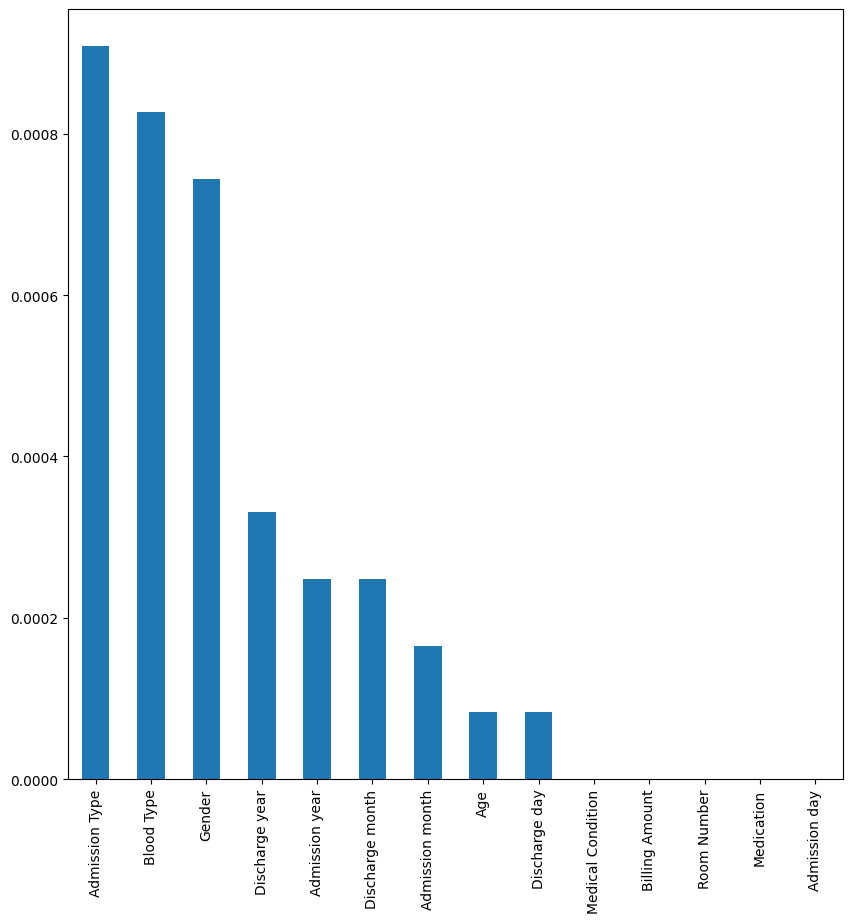

In [ ]:
plt.figure(figsize = (10,10))
mutual_info.sort_values(ascending=False).plot.bar()

####Variance Threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold = 0.9)

In [ ]:
selector.fit(x)

VarianceThreshold(threshold=0.9)

In [ ]:
selector.get_support()

array([ True, False, False, False,  True,  True, False, False,  True,
        True,  True,  True,  True,  True])

##Feature Selecion (Nulls Dropped)

####Chi test

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k = 2)
X_Mode_kbest_features = chi2_features.fit_transform(x_no_null, y_no_null)

print('Original feature number:', x_no_null.shape[1])
print('Reduced feature number:', X_Mode_kbest_features.shape[1])

Original feature number: 14
Reduced feature number: 2


In [ ]:
concol = [column for column in x.columns
          if column in x_no_null.columns[X_kbest_features.shape[1]]]

for features in concol:
    print(features)

Blood Type


####Information Gain

In [ ]:
#Info gain
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_no_null, y_no_null)
mutual_info

array([0.        , 0.00651485, 0.00088856, 0.00226751, 0.00266588,
       0.00237296, 0.        , 0.00311034, 0.        , 0.        ,
       0.00595088, 0.00205095, 0.00409075, 0.        ])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_no_null.columns
mutual_info.sort_values(ascending=False)

Gender               0.006515
Admission year       0.005951
Discharge month      0.004091
Medication           0.003110
Billing Amount       0.002666
Room Number          0.002373
Medical Condition    0.002268
Discharge day        0.002051
Blood Type           0.000889
Age                  0.000000
Admission Type       0.000000
Admission day        0.000000
Admission month      0.000000
Discharge year       0.000000
dtype: float64

<Axes: >

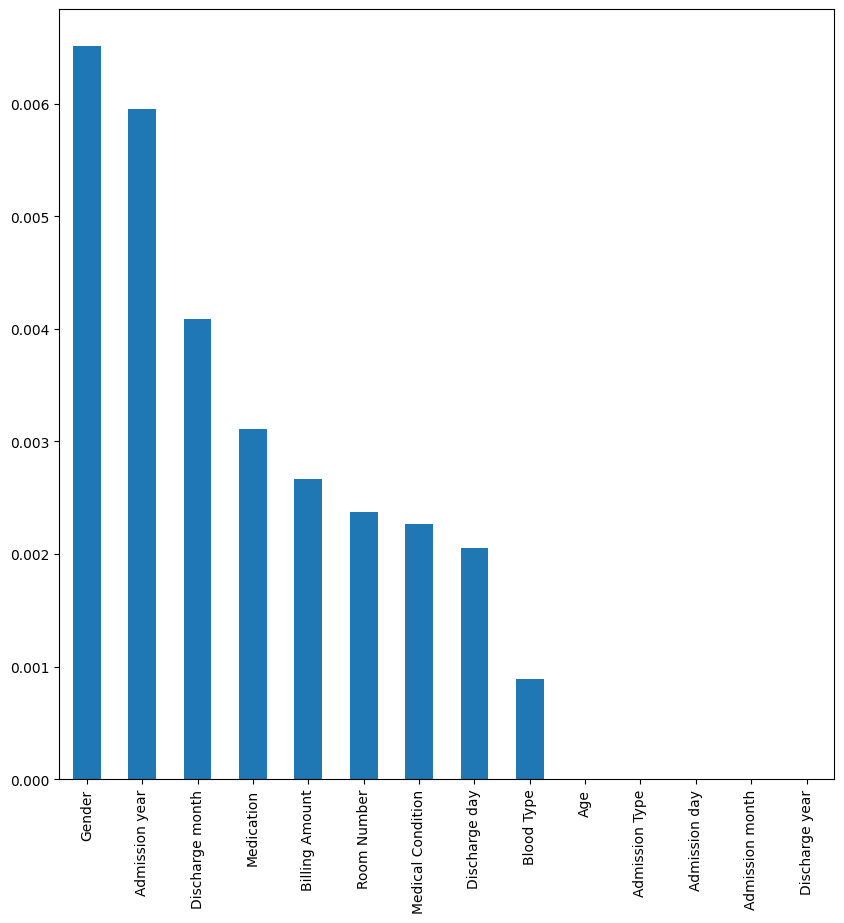

In [ ]:
plt.figure(figsize = (10,10))
mutual_info.sort_values(ascending=False).plot.bar()

####Variance Threshhold

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold = 0.9)

In [ ]:
selector.fit(x)

VarianceThreshold(threshold=0.9)

In [ ]:
selector.get_support()

array([ True, False, False, False,  True,  True, False, False,  True,
        True,  True,  True,  True,  True])

#-------------------------------------------------------------------------------
-------------------------------------------------------------------------------

#Test Data

####Import

In [ ]:
#import test data
df_test=pd.read_csv("healthcare_test.csv")

####Overview

In [ ]:
df_test.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Keller,84,Male,AB-,Hypertension,2019-05-31,Mike Walker,Patterson-Johnson,Cigna,5402.833461,410,Elective,2019-06-09,Penicillin,Abnormal
1,Jesse Weaver,39,Female,AB+,Obesity,2019-04-19,Andrew Carter,Boyd LLC,Blue Cross,48779.537911,235,Elective,2019-05-18,Ibuprofen,Abnormal
2,Elizabeth Allen,75,Female,A-,Arthritis,2021-03-30,Yvonne Wilkinson,"Clark, Garcia and Cobb",Blue Cross,47431.905702,-472,Urgent,2021-04-17,NaN,Normal
3,Gregory Martin,26,Female,O+,NaN,2021-07-08,Mrs. Bailey Howard MD,"Rodriguez, Aguilar and Zimmerman",Medicare,29210.176374,126,Emergency,2021-07-15,Aspirin,Abnormal
4,Julie Hartman,84,Male,AB-,Cancer,2021-05-17,Daniel Mills,Wright-Spencer,Medicare,1739.106108,222,Urgent,2021-06-16,Lipitor,Normal


In [ ]:
df_test.shape

(674, 15)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                674 non-null    object 
 1   Age                 674 non-null    int64  
 2   Gender              674 non-null    object 
 3   Blood Type          674 non-null    object 
 4   Medical Condition   668 non-null    object 
 5   Date of Admission   674 non-null    object 
 6   Doctor              674 non-null    object 
 7   Hospital            674 non-null    object 
 8   Insurance Provider  674 non-null    object 
 9   Billing Amount      674 non-null    float64
 10  Room Number         674 non-null    int64  
 11  Admission Type      674 non-null    object 
 12  Discharge Date      674 non-null    object 
 13  Medication          668 non-null    object 
 14  Test Results        674 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 79.1+ K

####Check Duplicates

In [ ]:
df_test.duplicated().sum()

0

####Handling Date Columns


In [ ]:
df_test['Date of Admission'] = pd.to_datetime(df_test['Date of Admission'])

# extract the day, month, and year components
df_test['Admission day'] = df_test['Date of Admission'].dt.day
df_test['Admission month'] = df_test['Date of Admission'].dt.month
df_test['Admission year'] = df_test['Date of Admission'].dt.year

df_test.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Admission day,Admission month,Admission year
0,Bobby Keller,84,Male,AB-,Hypertension,2019-05-31,Mike Walker,Patterson-Johnson,Cigna,5402.833461,410,Elective,2019-06-09,Penicillin,Abnormal,31,5,2019
1,Jesse Weaver,39,Female,AB+,Obesity,2019-04-19,Andrew Carter,Boyd LLC,Blue Cross,48779.537911,235,Elective,2019-05-18,Ibuprofen,Abnormal,19,4,2019
2,Elizabeth Allen,75,Female,A-,Arthritis,2021-03-30,Yvonne Wilkinson,"Clark, Garcia and Cobb",Blue Cross,47431.905702,-472,Urgent,2021-04-17,NaN,Normal,30,3,2021
3,Gregory Martin,26,Female,O+,NaN,2021-07-08,Mrs. Bailey Howard MD,"Rodriguez, Aguilar and Zimmerman",Medicare,29210.176374,126,Emergency,2021-07-15,Aspirin,Abnormal,8,7,2021
4,Julie Hartman,84,Male,AB-,Cancer,2021-05-17,Daniel Mills,Wright-Spencer,Medicare,1739.106108,222,Urgent,2021-06-16,Lipitor,Normal,17,5,2021


In [ ]:
df_test['Discharge Date'] = pd.to_datetime(df_test['Discharge Date'])

# extract the day, month, and year components
df_test['Discharge day'] = df_test['Discharge Date'].dt.day
df_test['Discharge month'] = df_test['Discharge Date'].dt.month
df_test['Discharge year'] = df_test['Discharge Date'].dt.year

df_test.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Admission Type,Discharge Date,Medication,Test Results,Admission day,Admission month,Admission year,Discharge day,Discharge month,Discharge year
0,Bobby Keller,84,Male,AB-,Hypertension,2019-05-31,Mike Walker,Patterson-Johnson,Cigna,5402.833461,...,Elective,2019-06-09,Penicillin,Abnormal,31,5,2019,9,6,2019
1,Jesse Weaver,39,Female,AB+,Obesity,2019-04-19,Andrew Carter,Boyd LLC,Blue Cross,48779.537911,...,Elective,2019-05-18,Ibuprofen,Abnormal,19,4,2019,18,5,2019
2,Elizabeth Allen,75,Female,A-,Arthritis,2021-03-30,Yvonne Wilkinson,"Clark, Garcia and Cobb",Blue Cross,47431.905702,...,Urgent,2021-04-17,NaN,Normal,30,3,2021,17,4,2021
3,Gregory Martin,26,Female,O+,NaN,2021-07-08,Mrs. Bailey Howard MD,"Rodriguez, Aguilar and Zimmerman",Medicare,29210.176374,...,Emergency,2021-07-15,Aspirin,Abnormal,8,7,2021,15,7,2021
4,Julie Hartman,84,Male,AB-,Cancer,2021-05-17,Daniel Mills,Wright-Spencer,Medicare,1739.106108,...,Urgent,2021-06-16,Lipitor,Normal,17,5,2021,16,6,2021


####Drop Unneccesay Colums


In [ ]:
df_test.drop(['Name','Doctor','Hospital','Insurance Provider','Date of Admission','Discharge Date'], axis=1 , inplace=True)

####Checking Null Values

In [ ]:
df_test.isnull().sum()

Age                  0
Gender               0
Blood Type           0
Medical Condition    6
Billing Amount       0
Room Number          0
Admission Type       0
Medication           6
Test Results         0
Admission day        0
Admission month      0
Admission year       0
Discharge day        0
Discharge month      0
Discharge year       0
dtype: int64

###Handling Nulls

####Drop

In [ ]:
df_test_drop_nulls= df_test.dropna()

In [ ]:
df_test_drop_nulls.shape

(662, 15)

####Replace with Mode

In [ ]:
df_test['Medical Condition']=df_test['Medical Condition'].fillna("Cancer")

In [ ]:
df_test['Medication']=df_test['Medication'].fillna("Penicillin")

###Remove -ve from Room Number

In [ ]:
df_test['Room Number']=df_test['Room Number'].abs()

In [ ]:
df_test_drop_nulls['Room Number']=df_test_drop_nulls['Room Number'].abs()

<ipython-input-411-fcef26698e5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_drop_nulls['Room Number']=df_test_drop_nulls['Room Number'].abs()


In [ ]:
df_test.head()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Medication,Test Results,Admission day,Admission month,Admission year,Discharge day,Discharge month,Discharge year
0,84,Male,AB-,Hypertension,5402.833461,410,Elective,Penicillin,Abnormal,31,5,2019,9,6,2019
1,39,Female,AB+,Obesity,48779.537911,235,Elective,Ibuprofen,Abnormal,19,4,2019,18,5,2019
2,75,Female,A-,Arthritis,47431.905702,472,Urgent,Penicillin,Normal,30,3,2021,17,4,2021
3,26,Female,O+,Cancer,29210.176374,126,Emergency,Aspirin,Abnormal,8,7,2021,15,7,2021
4,84,Male,AB-,Cancer,1739.106108,222,Urgent,Lipitor,Normal,17,5,2021,16,6,2021


##Encoding Test Data (Mode)

In [ ]:
df_test["Gender"]=np.where(df_test['Gender']=='Male',0,
                   np.where(df_test['Gender']=='Female',1, 0.5))

In [ ]:
df_test["Blood Type"]=np.where(df_test['Blood Type']=='O+',0,
                   np.where(df_test['Blood Type']=='B-',1,
                   np.where(df_test['Blood Type']=='O-',2,
                   np.where(df_test['Blood Type']=='AB+',3,
                   np.where(df_test['Blood Type']=='A+',4,
                   np.where(df_test['Blood Type']=='A-',5,
                   np.where(df_test['Blood Type']=='AB-',6,
                   np.where(df_test['Blood Type']=='B+',7,8))))))))

In [ ]:
df_test["Medical Condition"]=np.where(df_test['Medical Condition']=='Asthma',1,
                              np.where(df_test['Medical Condition']=='Arthritis',2,
                              np.where(df_test['Medical Condition']=='Hypertension',3,
                              np.where(df_test['Medical Condition']=='Cancer',4,
                              np.where(df_test['Medical Condition']=='Diabetes',5,
                              np.where(df_test['Medical Condition']=='Obesity',6,0))))))

In [ ]:
df_test["Admission Type"]=np.where(df_test["Admission Type"]=='Emergency',1,
                            np.where(df_test["Admission Type"]=='Urgent',2,3))

In [ ]:
df_test["Medication"]=np.where(df_test["Medication"]=='Lipitor',1,
                       np.where(df_test["Medication"]=='Penicillin',2,
                       np.where(df_test["Medication"]=='Aspirin',3,
                       np.where(df_test["Medication"]=='Paracetamol',4,
                       np.where(df_test["Medication"]=='Ibuprofen',5,0)))))

In [ ]:
df_test["Test Results"]=np.where(df_test["Test Results"]=='Normal',0,1)

##Encoding Test Data(No Nulls)

In [ ]:
df_test_drop_nulls["Gender"]=np.where(df_test_drop_nulls['Gender']=='Male',0,
                   np.where(df_test_drop_nulls['Gender']=='Female',1, 0.5))

<ipython-input-419-74f8c36da186>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_drop_nulls["Gender"]=np.where(df_test_drop_nulls['Gender']=='Male',0,


In [ ]:
df_test_drop_nulls["Blood Type"]=np.where(df_test_drop_nulls['Blood Type']=='O+',0,
                   np.where(df_test_drop_nulls['Blood Type']=='B-',1,
                   np.where(df_test_drop_nulls['Blood Type']=='O-',2,
                   np.where(df_test_drop_nulls['Blood Type']=='AB+',3,
                   np.where(df_test_drop_nulls['Blood Type']=='A+',4,
                   np.where(df_test_drop_nulls['Blood Type']=='A-',5,
                   np.where(df_test_drop_nulls['Blood Type']=='AB-',6,
                   np.where(df_test_drop_nulls['Blood Type']=='B+',7,8))))))))

<ipython-input-420-1e1a03491920>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_drop_nulls["Blood Type"]=np.where(df_test_drop_nulls['Blood Type']=='O+',0,


In [ ]:
df_test_drop_nulls["Medical Condition"]=np.where(df_test_drop_nulls['Medical Condition']=='Asthma',1,
                              np.where(df_test_drop_nulls['Medical Condition']=='Arthritis',2,
                              np.where(df_test_drop_nulls['Medical Condition']=='Hypertension',3,
                              np.where(df_test_drop_nulls['Medical Condition']=='Cancer',4,
                              np.where(df_test_drop_nulls['Medical Condition']=='Diabetes',5,
                              np.where(df_test_drop_nulls['Medical Condition']=='Obesity',6,0))))))

<ipython-input-421-9ec34a1916d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_drop_nulls["Medical Condition"]=np.where(df_test_drop_nulls['Medical Condition']=='Asthma',1,


In [ ]:
df_test_drop_nulls["Admission Type"]=np.where(df_test_drop_nulls["Admission Type"]=='Emergency',1,
                            np.where(df_test_drop_nulls["Admission Type"]=='Urgent',2,3))

<ipython-input-422-e8f30b6b7958>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_drop_nulls["Admission Type"]=np.where(df_test_drop_nulls["Admission Type"]=='Emergency',1,


In [ ]:
df_test_drop_nulls["Medication"]=np.where(df_test_drop_nulls["Medication"]=='Lipitor',1,
                       np.where(df_test_drop_nulls["Medication"]=='Penicillin',2,
                       np.where(df_test_drop_nulls["Medication"]=='Aspirin',3,
                       np.where(df_test_drop_nulls["Medication"]=='Paracetamol',4,
                       np.where(df_test_drop_nulls["Medication"]=='Ibuprofen',5,0)))))

<ipython-input-423-7700b66b172a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_drop_nulls["Medication"]=np.where(df_test_drop_nulls["Medication"]=='Lipitor',1,


In [ ]:
df_test_drop_nulls["Test Results"]=np.where(df_test_drop_nulls["Test Results"]=='Normal',0,1)

<ipython-input-424-ef010c7d857a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_drop_nulls["Test Results"]=np.where(df_test_drop_nulls["Test Results"]=='Normal',0,1)
